# Pandas Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# see the pre-defined styles provided.
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### DataFrame.plot

In [56]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


<IPython.core.display.Javascript object>


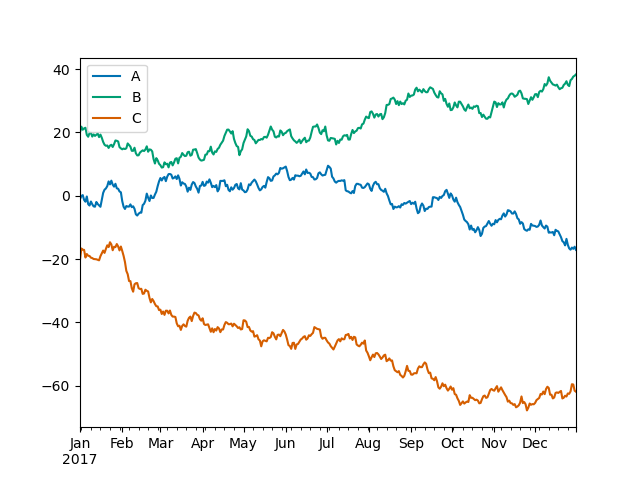

In [57]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

We can select which plot we want to use by passing it into the 'kind' parameter.

In [ ]:
df.plot('A','B', kind = 'scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

<IPython.core.display.Javascript object>


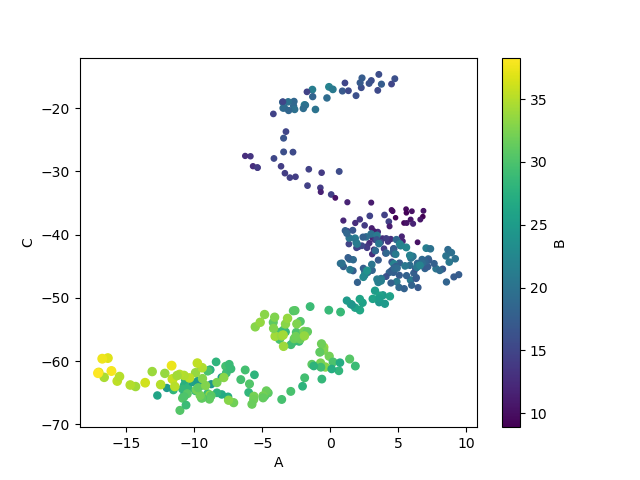

<AxesSubplot:xlabel='A', ylabel='C'>

In [59]:
# We can create a plot where each dot can have a different color and size

# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

<IPython.core.display.Javascript object>


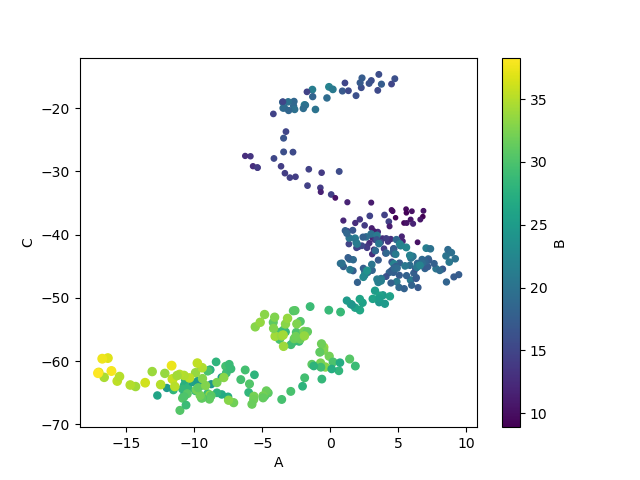

<AxesSubplot:xlabel='A', ylabel='C'>

In [60]:
# se pueden poner el nombre de las columnas o df['nombre columna']
# ej 'B' o df['B']

df.plot.scatter('A', 'C', c='B', s='B', colormap='viridis')

In [ ]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

In [ ]:
df.plot.box();

In [ ]:
df.plot.hist(alpha=0.7);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

In [ ]:
df.plot.kde();

### pandas.tools.plotting

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [ ]:
iris = pd.read_csv('iris.csv')
iris.head()

In [ ]:
pd.tools.plotting.scatter_matrix(iris);

In [ ]:
plt.figure()
pd.tools.plotting.parallel_coordinates(iris, 'Name');

# Seaborn

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [62]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

In [65]:
v1

0       4.714352
1     -11.909757
2      14.327070
3      -3.126519
4      -7.205887
         ...    
995     2.721640
996     9.315458
997     3.275323
998     7.408138
999    -8.019050
Name: v1, Length: 1000, dtype: float64

<IPython.core.display.Javascript object>


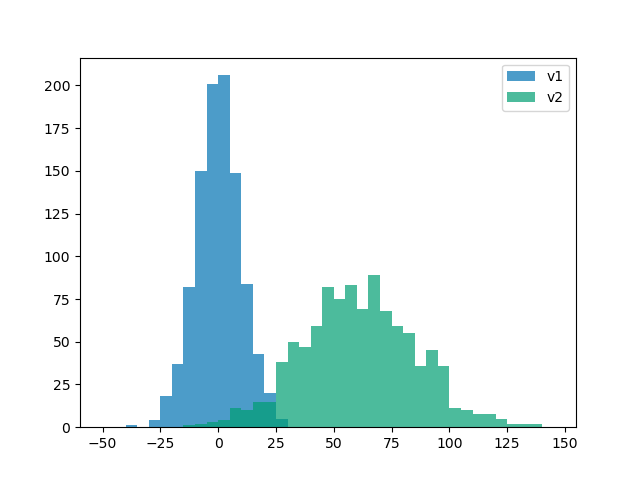

In [66]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

<IPython.core.display.Javascript object>


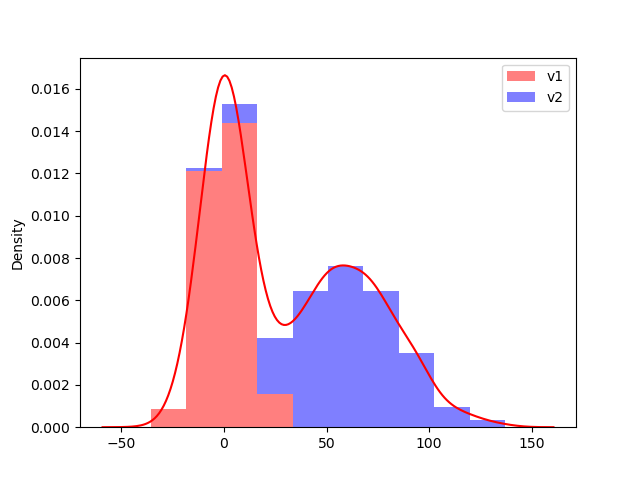

In [105]:
# plot a kernel density estimation over a stacked barchart
plt.figure()

# Acá hace un histograma con dos distribuciones y las apila. Sería lo mismo que graficar la concatenación de los datos.
# Hice el gráfico de la concatenación en la fila 93 y los gráficos son iguales
plt.hist([v1, v2], alpha=0.5, histtype='bar', stacked=True, density=True, color=['red','blue'], label=['v1','v2']);
plt.legend()

# Al concatenar v1 y v2 se obtiene una serie de 2000 datos
v3 = np.concatenate((v1,v2))

# Usa la concatenación de datos v3 para realizar un KDE que es un histrograma pero con distribución contínua
sns.kdeplot(v3, color='r');




In [81]:
# Vemos que al concatenar se creó un array de 2000 puntos verticales
v3.shape

(2000,)

<IPython.core.display.Javascript object>


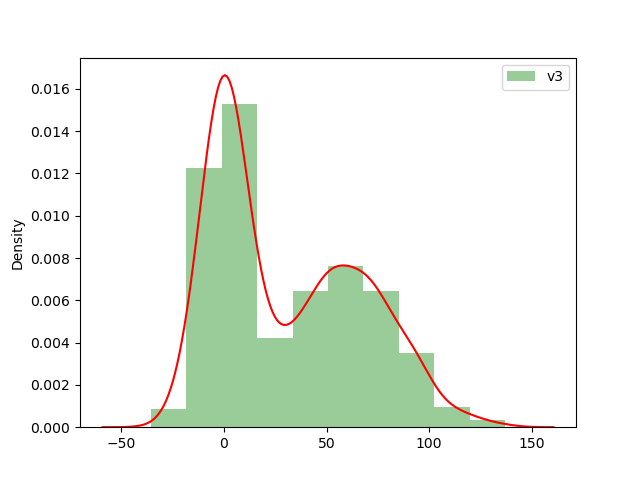

In [107]:
# Hago lo mismo que en la mila 92 pero sin hacer stack de las distribuciones, sino que al estar concatenadas
# el histograma las agrupa.

plt.figure()
plt.hist(v3, alpha=0.4, color='green', density=True, label='v3');
plt.legend()
sns.kdeplot(v3, c='r');

<IPython.core.display.Javascript object>


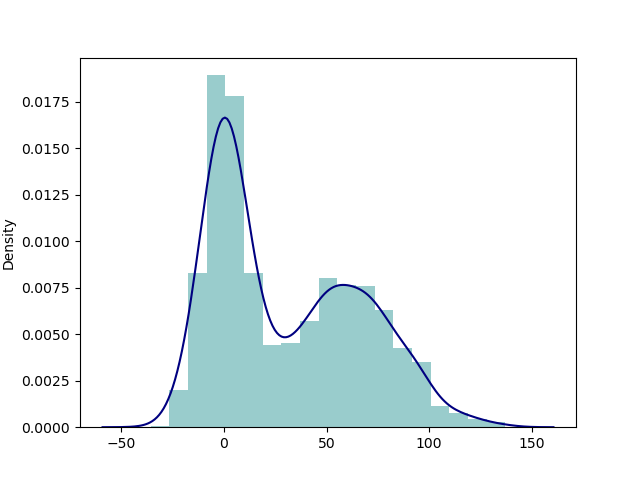

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [110]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


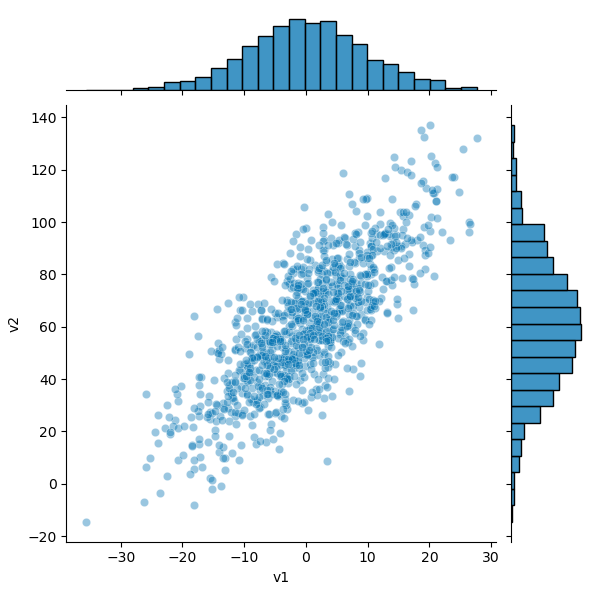

In [113]:
sns.jointplot(v1, v2, alpha=0.4);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


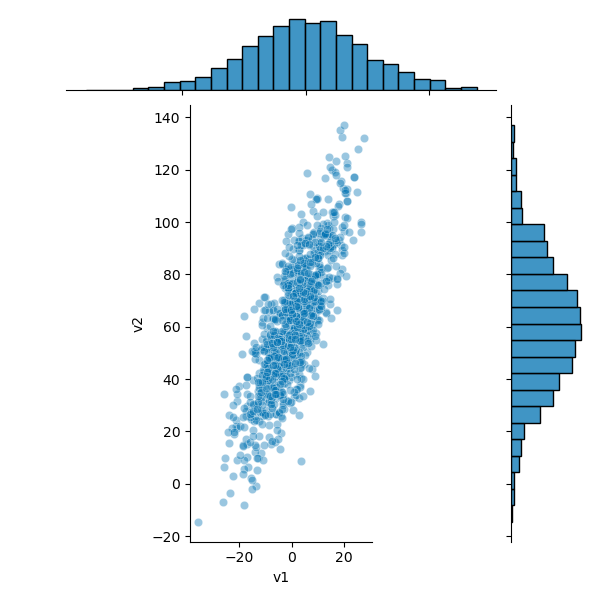

In [114]:
# Jointplot devuelve un objeto del tipo seaborn.axisgrid.JointGrid que podemos modificarlo
grid = sns.jointplot(v1, v2, alpha=0.4);

# Modificamos el gráfico para que la relación entre los ejes sea la misma
grid.ax_joint.set_aspect('equal')

In [115]:
# Veamos qué tipo de objeto es grid
grid

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


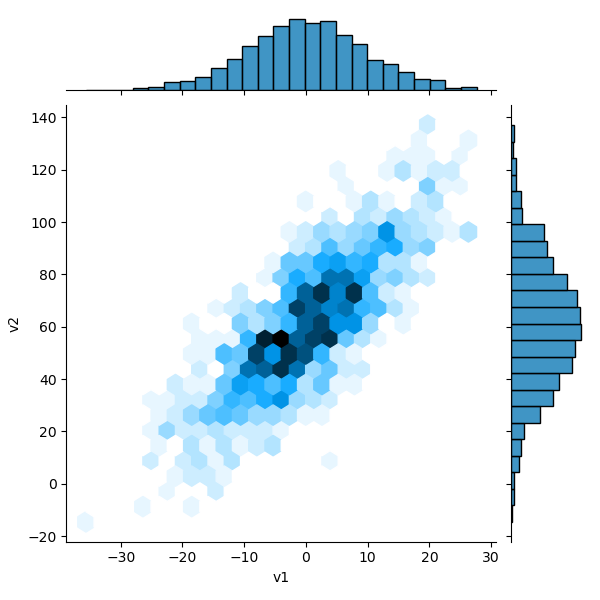

In [116]:
# Para hacer Hexbinplots: útil cuando se quieren comparar dos variables con gran volumen de datos

sns.jointplot(v1, v2, kind='hex');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


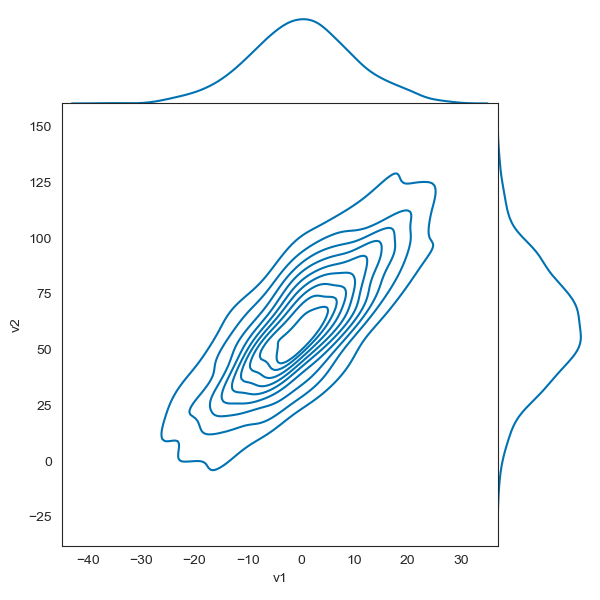

In [123]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);

In [132]:
# Lets import the Iris dataset

csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Name']
iris =  pd.read_csv(csv_url, names = col_names)

iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<IPython.core.display.Javascript object>


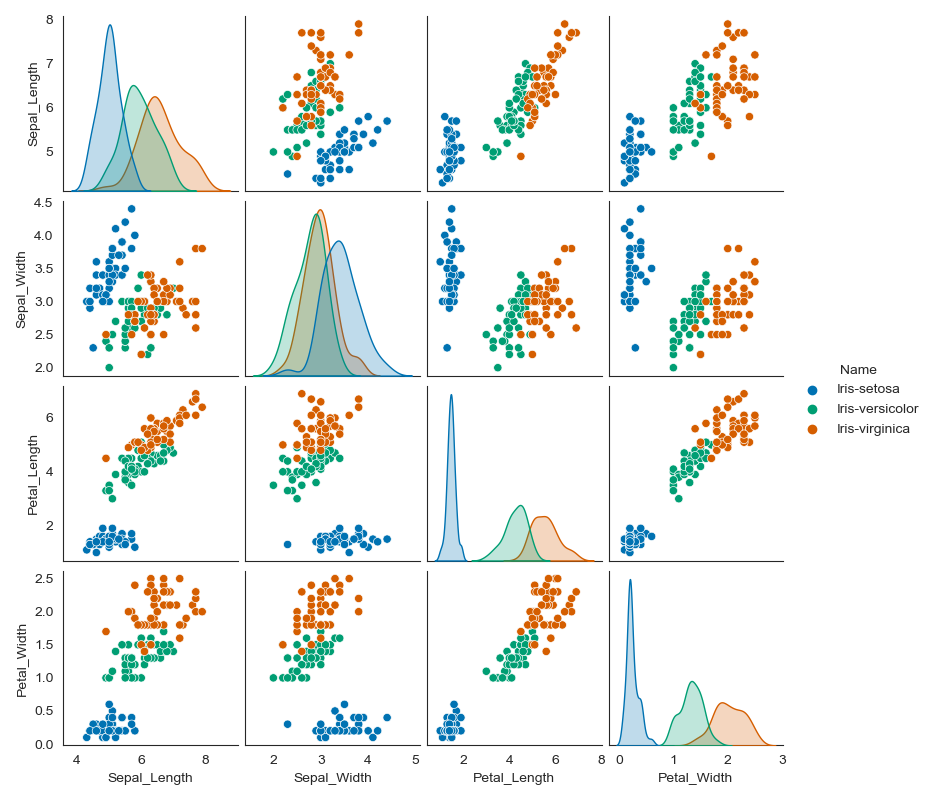

In [134]:
sns.pairplot(iris, hue='Name', diag_kind='kde', height=2);

<IPython.core.display.Javascript object>


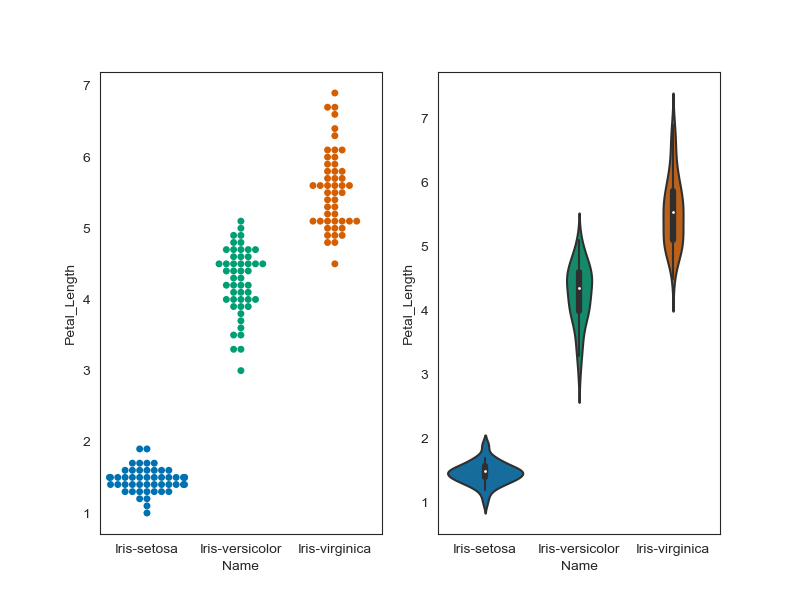

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [137]:
# Violinplots
# La ventaja es que combina la información de un boxplot (percentiles, median) en cojunto con un KDE (distribucion de la var)

plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'Petal_Length', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'Petal_Length', data=iris);